<h4>Метод подстановки</h4>

<p> В качестве точечной оценки неизвестного параметра берем выборочный аналог 
<br>
<p> Пример: 
<li> Предложенная выборка получена из нормально распределенной генеральной совокупности $N(a,\sigma)$
<li> С помощь метода подстановки найдите точечную оценку параметра a.

In [1]:
import numpy as np

def return_stat(sample: list, stat: str) -> float:
    
    stat_dict = {
        'mean': np.mean,
        'std': np.std,
        'median': np.median
    }
    
    return stat_dict[stat](sample)

sample = [28.95, 29.66, 31.03, 31.8, 29.75, 29.05, 27.52, 29.6, 29.76, 27.43,
          28.15, 28.0, 29.85, 27.95, 32.54, 28.57, 25.39, 30.91, 33.13, 30.93]

print('Точеченая оценка параметра а: ', round(return_stat(sample, 'mean'), 3))

Точеченая оценка параметра а:  29.498


<h4> Из продукции станка извлечена выборка изделий и результаты измерений одного из размеров изделий (в мм) </h4>
<p> Предполагая, что выборка значений контролируемого размера изделий подчиняется нормальному закону распределения,
найдите оценку дисперсии с помощью метода моментов.

In [2]:
sample = [17.4, 19.9, 19.9, 19.0, 20.7, 18.2, 18.6, 20.3, 21.7, 20.8, 16.7, 20.3,
          22.5, 18.3, 21.1, 16.3, 22.0, 19.5, 18.1, 21.1, 20.0, 21.6, 21.5, 21.1,
          23.3, 23.0, 17.8, 19.5, 21.6, 22.9]

print('Точечная оценка дисперсии: ', round(return_stat(sample, 'std') ** 2, 3))

Точечная оценка дисперсии:  3.414


<h4>Дать оценку неизвестного параметра МП</h4>

По предложенной выборке с помощью метода максимального правдоподобия найдите точечную оценку параметра $\theta$ равномерно на $[0, \theta]$ распределенной случайной величины

In [3]:
def evaluate_uniform_theta(sample: list) -> float:
    variation_row = sorted(sample)
    return variation_row[-1]

sample = [11.25, 1.67, 5.72, 1.9, 6.07, 7.71, 4.48, 14.95, 2.32,
          3.52, 2.35, 4.79, 0.74, 8.66, 13.43, 8.41, 1.24, 15.4,
          6.95, 5.94
         ]

print('n-я порядкова статистика есть оценка для theta: ', evaluate_uniform_theta(sample))

n-я порядкова статистика есть оценка для theta:  15.4


<h4>Метод правдоподобия</h4>

Рассмотрим следующий эксперимент, имитирующий поведение пользователя  при поиске информации в поисковой системе:
<br>
<br>
<li> Пользователь последовательно просматривает документы до тех пор, пока не найдет нужную информацию или не устанет.
<li> Вероятность того, что пользователь найдет информацию в документе с номером i равна p, вероятность того, что он не найдет информацию в документе i равна (1-p). Вероятность p не зависит от номера документа. 
<li> Вероятность того, что пользователь устанет после просмотра i-го документа равна g, соответственно продолжит поиски с вероятностью (1−g). Данная вероятность не зависит от номера просматриваемого документа. 
<li >Пользователь всегда просматривает как минимум один документ. При этом нам известно, нашел ли пользователь информацию или нет (F - нашел, N - не нашел)

<h6>Наблюдение:</h6> 
<p>число просмотренных документов и факт "найдена информация или нет"

<h6>Например:</h6>
<li> наблюдение '2 F' означает, что пользователь просмотрел первый документ, не нашел в нем информацию, не устал,  просмотрел второй документ и нашел в нем информацию.
<li> наблюдение  '1 N' означает, что пользователь просмотрел первый документ, не нашел в нем информацию и устал, прекратил просматривать документы.

In [4]:
import pandas as pd

def probability_mass_function(sample_element: str) -> tuple:
    
    n, status = sample_element.split()
    power_dict = {
        '1 - p': int(n) - 1,
        'p': 0,
        '1 - g': int(n) - 1,
        'g': 0
    }
    
    if status == 'F':
        power_dict['p'] += 1
    
    if status == 'N':
        power_dict['1 - p'] += 1
        power_dict['g'] += 1
    
    return power_dict

In [5]:
input_sample = pd.read_csv('sample_2_4.txt', header=None, names=['element'])

input_sample['power_dict'] = input_sample.element.apply(lambda x: probability_mass_function(x))

input_sample['1 - p'] = input_sample.power_dict.apply(lambda x: x['1 - p'])
input_sample['p'] = input_sample.power_dict.apply(lambda x: x['p'])
input_sample['1 - g'] = input_sample.power_dict.apply(lambda x: x['1 - g'])
input_sample['g'] = input_sample.power_dict.apply(lambda x: x['g'])

minus_p, p, minus_g, g = input_sample.iloc[:, 1:].sum().values

print('Степень (1-p): ', minus_p)
print('Степень p: ',p)
print('Степень (1-g): ',minus_g)
print('Степень g: ',g)

Степень (1-p):  97
Степень p:  78
Степень (1-g):  75
Степень g:  22


<h6>Функция правдоподобия данной выборки:</h6>
<br>
<li>$L(X_n) = (1-p)^{97}p^{78}(1-g)^{75}g^{22}$

<h6>Найдем частные производные по p и g и приравняем к нулю:</h6>
<br>
<li>$\large\frac{\partial L(X_n)}{\partial p} = 0$
<br>
<br>
<li>$\large\frac{\partial L(X_n)}{\partial g} = 0$

<p> Точечная оценка по ММП для p = 0.446, g = 0.227

### Асимтотическая нормальность

С помощью моделирования проверьте, является ли точечная оценка параметра $\lambda$ экспоненциально распределенной случайной величины, полученная методом максимального правдоподобия, асимптотически нормальной.

Для этого:
<li> найдите точечную оценку параметра $\lambda$ экспоненциально распределенной случайной величины с помощью методом максимального правдоподобия
<li> проведите моделирование
    <ul>
        <li> задайте параметр $\lambda$ экспоненциально распределенной случайной величины
        <li> смоделируйте 500 выборок объемом 1000 из генеральной совокупности с выбранным значением параметра  $\lambda$
        <li> для каждой (из 500) выборки найдите значение точечной оценки параметра 
            и постройте гистограмму распределения точечных оценок
        <li> Увеличьте число моделируемых выборок до 1000 или 5000. Проанализируйте, что изменилось
    </ul>

In [6]:
from scipy.stats import expon

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


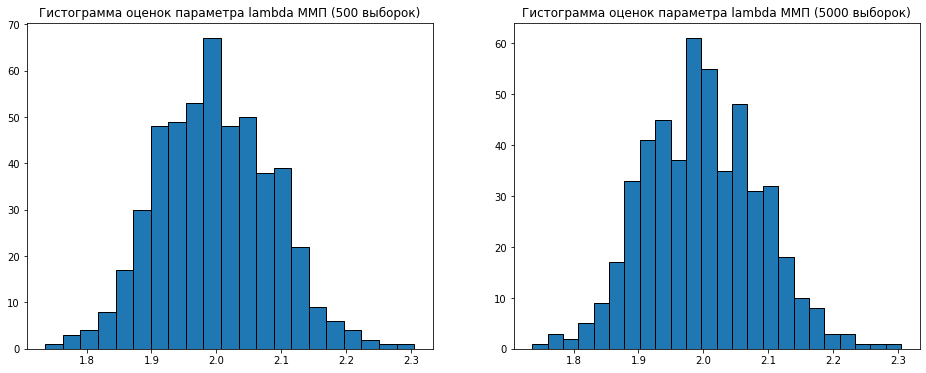

In [7]:
def evaluate_lambda(sample: list) -> float:
    return len(sample) * 1.0 / sum(sample)

samples = [expon.rvs(scale=0.5, size=500) for index in range(1, 501)]
lambda_values = [evaluate_lambda(sample) for sample in samples]

samples_5000 = [expon.rvs(scale=0.5, size=5000) for index in range(1, 5001)]
lambda_values_5000 = [evaluate_lambda(sample) for sample in samples_5000]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].hist(lambda_values, edgecolor='black', bins=21)
ax[0].set_title('Гистограмма оценок параметра lambda ММП (500 выборок)')

ax[1].hist(lambda_values, edgecolor='black', bins=24)
ax[1].set_title('Гистограмма оценок параметра lambda ММП (5000 выборок)')
plt.show()